In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit 

In [2]:
data = psu.read_file('data/2020_11_09/SiPM1_27_5_LED2p75.dat')

data/2020_11_09/SiPM1_27_5_LED2p75.dat Number of events 303153.0


/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


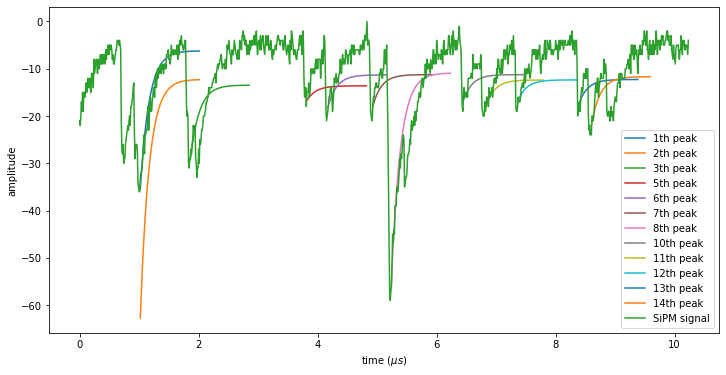

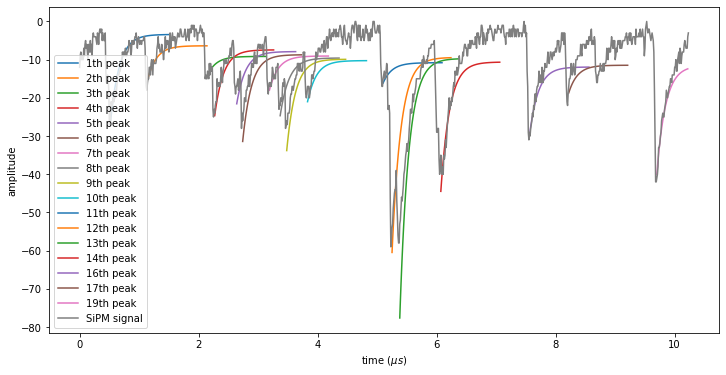

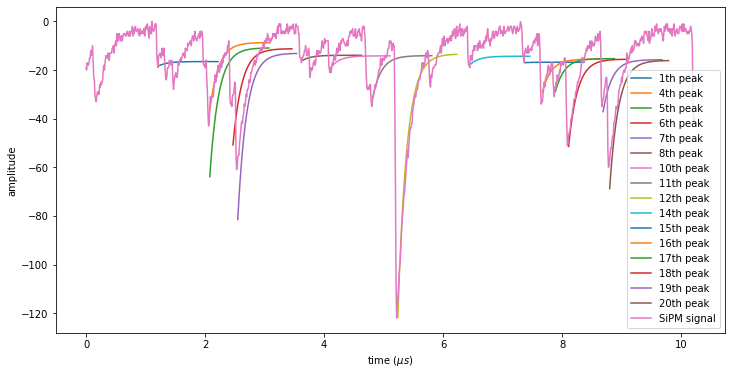

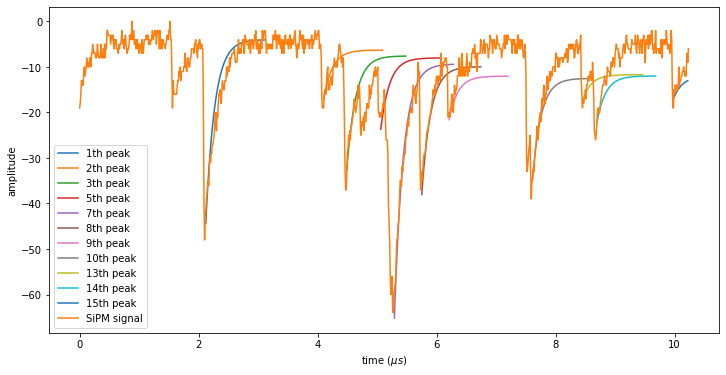

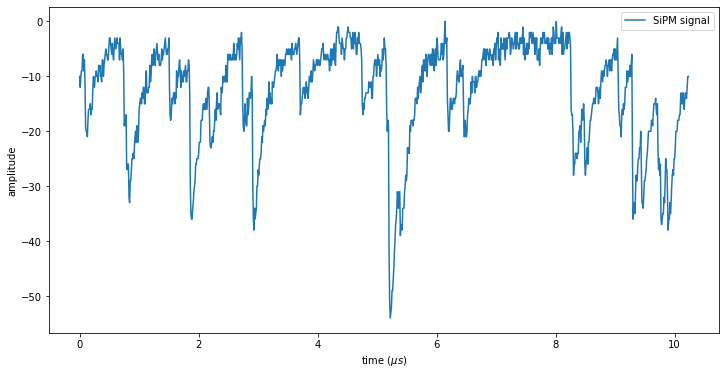

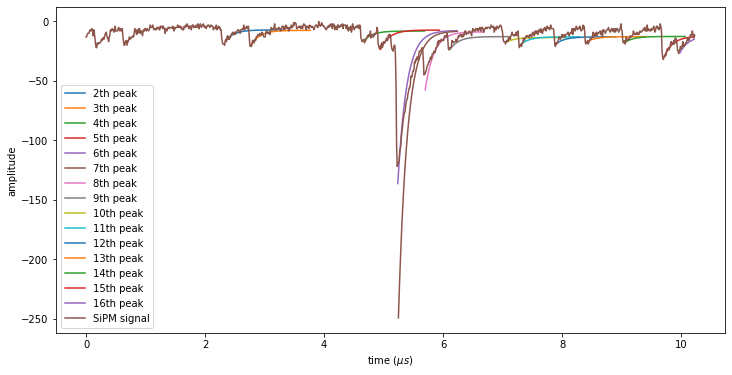

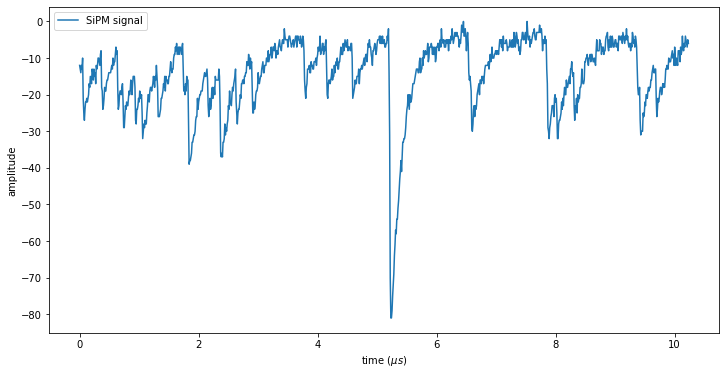

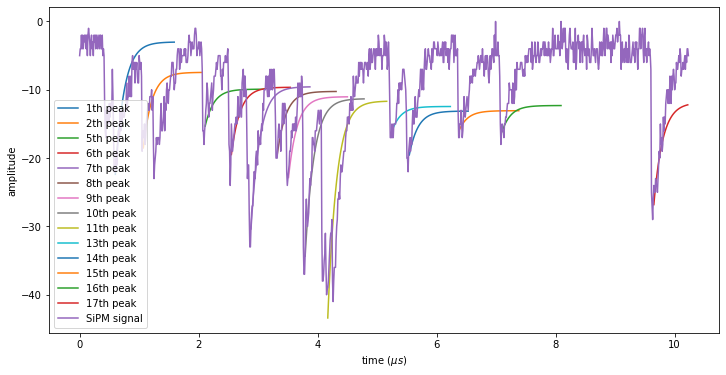

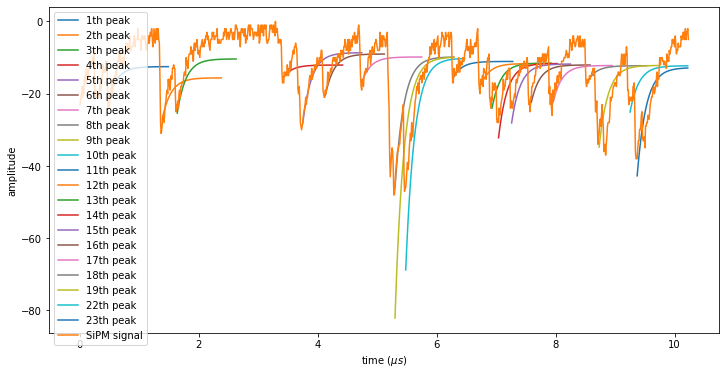

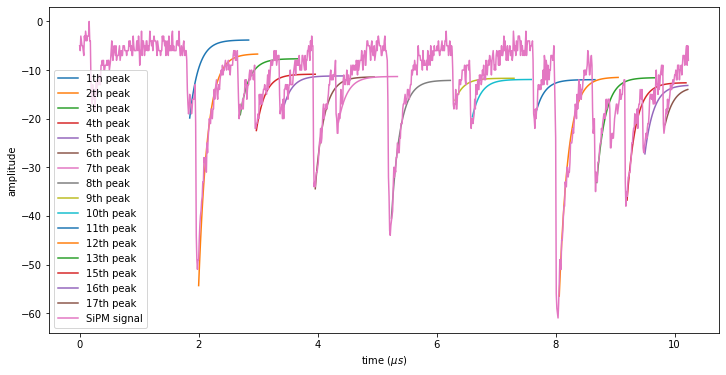

In [3]:
for i in range(10):
    plt.figure(figsize=(12,6))
    dts = np.arange(0,data.shape[1]*10,10)
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    psu.integral_dled(data[i],listpeaks,-2,2,12,100,3,10,1)

In [105]:
def integral_dled( wf, peaks_list, dtl = -2, dtr = 1,
                  tfit = 20, tlim = 100, tc = 5, tlr = 10, plot=False):
    # tlim = time window of the fit integration
    # tfit = time window of the fit
    # tc = min time to consider 2 peaks independently
    # tlr = right limit of the window to search Amin
    inttot = 0
    blmoy = wf.max()
    wf0 = wf - blmoy
    tt = np.array([i for i in range(len(wf))]) # time in bin-size
    tplot_tot = []
    A_tot = []
    for i in range(len(peaks_list)//2):
        dt = peaks_list[2*i + 1] - peaks_list[2*i]
        if dt < tc: continue
        bl = np.mean(wf0[peaks_list[2*i]-9:peaks_list[2*i]+1])
        Am = wf0[peaks_list[2*i]:peaks_list[2*i+1] + tlr]
        ttm = tt[peaks_list[2*i]:peaks_list[2*i+1] + tlr]
        Amin = np.min(Am) #local min of the signal
        tmin = ttm[Am == Amin][0] #time of the min
        if abs(tmin - len(wf)/2) > 15: continue
        tl = tt[(tt <= tmin+dtr) & (tt >= tmin+dtl)]
        wfl = wf0[(tt <= tmin+dtr) & (tt >= tmin+dtl)]
        Il = -1*integ.simps(wfl, tl/100)
        tr = tt[tmin+dtr:tmin+tfit] # time window for the fit
        amp = bl - Amin
        if len(tr) >= 5 and amp > 0:
            tr2 = tr - tr[0]
            #print('tmin:',tmin,'bl:',bl,'amp max:',amp)
            #try:
            fct_fit = psu.expo2(bl) # fct used for the fit
            popt, pcov = curve_fit(fct_fit, tr2/100, wf0[tr],
                                    p0 = np.array([amp, 6.8]),
                                    bounds =  ([amp/1.5, 6.7], [amp*1.5, 6.8]))
            a, b = popt
            tnew = tt[tr[0]:]
            if plot:
                #if cond == 1:
                fct_fit_tot = fct_fit((tnew-tr[0])/100,a,b)
                #else:
                #fct_fit_tot = fct_fit_tot[tr[0]-tlimplot:] - bl_old + fct_fit((tnew - tr[0])/100, a, b)
                #tplot = tt[tlimplot:tr[0]]
                #tplot_tot += list(tplot/100)
                #A_tot += list(wf[tplot])
                tnew2 = min(tlim, tt[-1]-tr[0])
                plt.plot(tnew[:tnew2]/100, fct_fit_tot[:tnew2], label = '%sth peak'%i)    
                tlimplot = tr[0]
                bl_old = bl
            fct_int = lambda x : bl - fct_fit(x, a, b)
            #print('bl, a, b : ', bl, a, b)
            Ir, err = integ.quad(fct_int, 0, (tlim-dtr)/100)
            inttot = Il + Ir
            #print(f'Integral: {Il:.1f} + {Ir:.1f} = {inttot:.2f}')
            tl = tt[tt >= peaks_list[2*i+1]+dtl]
    if plot:
        #plt.plot(tplot_tot, A_tot)
        plt.plot(tt/100, wf0, label = 'SiPM signal')
        plt.xlabel(r'time ($\mu s$)')
        plt.ylabel('amplitude')
        plt.legend()
    if inttot is not 0: return inttot

8.835272636027355

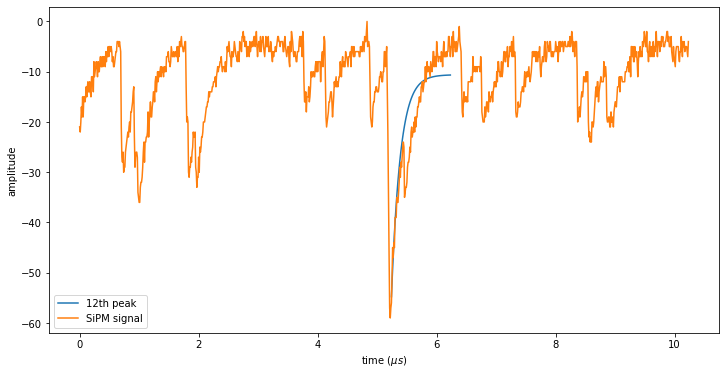

In [106]:
plt.figure(figsize=(12,6))
integral_dled(data[0],listpeaks,-2,2,12,100,3,20,1)

In [114]:
nn = len(data)
peakint, peakintd = np.zeros(nn), np.zeros(nn)
print('Total events:',nn)
for i in range(nn):
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    peakint[i] = integral_dled(data[i],listpeaks,-2,2,12,100,3,10)
    if (i % 1000) == 0: print(f'event n. {i} area {peakint[i]:.2f}')

Total events: 303153
event n. 0 area 9.01
event n. 1000 area 5.59
event n. 2000 area 13.44
event n. 3000 area 9.60
event n. 4000 area 15.44
event n. 5000 area 6.52
event n. 6000 area 5.13
event n. 7000 area 11.13
event n. 8000 area 12.12
event n. 9000 area 15.23
event n. 10000 area 13.60
event n. 11000 area 9.19
event n. 12000 area 11.65
event n. 13000 area 9.49
event n. 14000 area 4.82
event n. 15000 area 2.55
event n. 16000 area 11.85
event n. 17000 area 9.52
event n. 18000 area 7.66
event n. 19000 area 10.00
event n. 20000 area 13.93
event n. 21000 area 4.09
event n. 22000 area 5.75
event n. 23000 area 9.98
event n. 24000 area 8.12
event n. 25000 area 21.65
event n. 26000 area nan
event n. 27000 area 9.81
event n. 28000 area 7.26
event n. 29000 area 15.70
event n. 30000 area 1.78
event n. 31000 area nan
event n. 32000 area 19.03
event n. 33000 area 11.37
event n. 34000 area 7.32
event n. 35000 area 2.37
event n. 36000 area 3.22
event n. 37000 area 8.01
event n. 38000 area 21.88
even

In [115]:
print(len(peakint[peakint>0]))
np.save('peakint_SiPM1_27_5_LED2p75.npy', peakint)

290773


/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


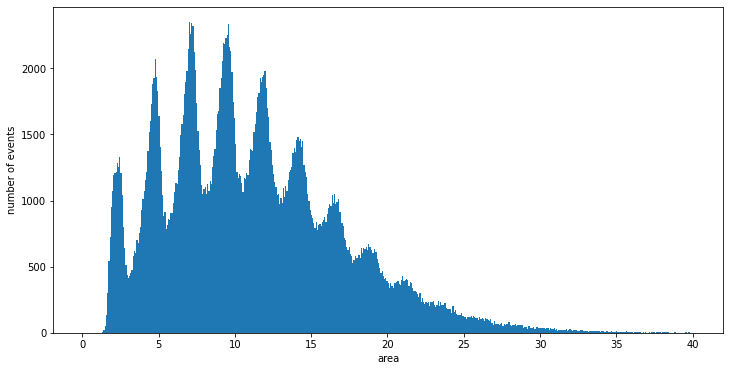

In [117]:
psu.histo_plot(peakint,0.1,40,500)

In [118]:
peakint.max()

TypeError: max expected 1 arguments, got 0